#PRVI DIO

##Zadatak 1
##Napisati algoritam koji za dani graf (bilo kakav unos) ispituje je li bipartitan.

In [301]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [302]:
#Definiram bipartitan graf:
bipartitan_graf = nx.Graph()
bipartitan_graf.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (6,2) , (6,3)])

#Definiram nebipartitan graf:
nije_bipartitan=nx.Graph()
nije_bipartitan.add_edges_from([(1,2),(1,3),(1,4),(2,3)])

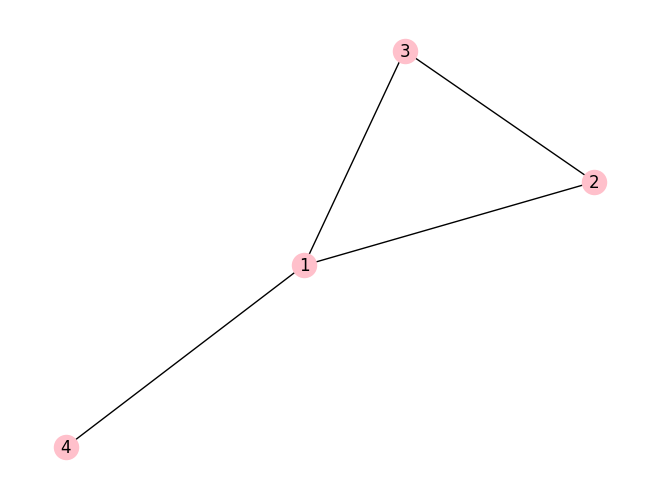

In [303]:
#Prikaz nebipartitnog grafa:
nx.draw(nije_bipartitan, with_labels=True, node_color="pink")
plt.show()

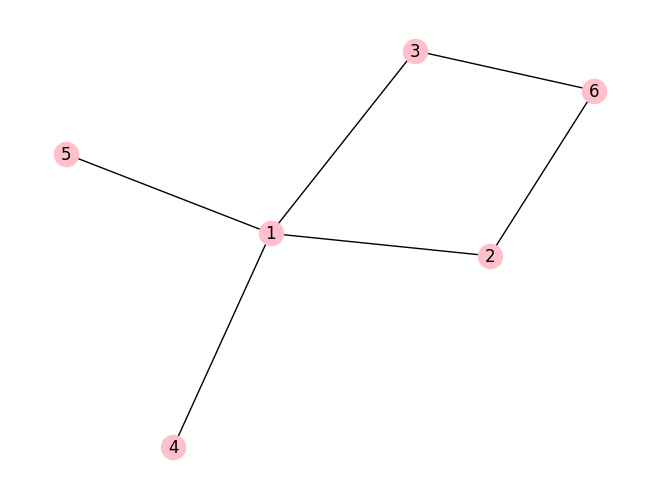

In [304]:
#Prikaz bipartitnog grafa:
nx.draw(bipartitan_graf, with_labels=True, node_color="pink")
plt.show()

In [305]:
from collections import deque   #koristi se za manipuliranje redom čvorova u BFS algoritmu

def is_bipartite(graph):
    # Funkcija za provjeru bipartitnosti grafa koristeći BFS
    # graph: reprezentacija grafa kao rječnik (dictionary)

    # provjera je li graf prazan
    if not graph:
        return True

    # inicijalizacija obojenja i reda za BFS
    color = {}
    for node in graph:
        color[node] = None
    queue = deque()

    # BFS počinje od bilo kojeg čvora
    start_node = next(iter(graph))
    queue.append(start_node)
    color[start_node] = 0

    while queue:
        current_node = queue.popleft()
        for neighbor in graph[current_node]:
            if color[neighbor] is None:
                # oboji čvor i dodaj ga u red
                color[neighbor] = 1 - color[current_node]
                queue.append(neighbor)
            elif color[neighbor] == color[current_node]:
                # ako susjed ima istu boju kao i trenutni čvor, graf nije bipartitan
                return False

    return color

In [306]:
def draw_bipartite(graph, colors):
    # Crtanje bipartitnog grafa sa obojenim čvorovima prema particijama
    # graph: reprezentacija bipartitnog grafa kao rječnik (dictionary)
    # colors: rječnik obojenih čvorova prema particijama

    # formiranje liste boja za crtanje grafa
    node_colors = ['lightblue' if colors[node] == 0 else 'lightcoral' for node in graph]

    # Crtanje grafa
    nx.draw(nx.Graph(graph), with_labels=True, node_color=node_colors, node_size=1000, font_size=12, font_weight='bold')
    plt.title('Bipartitni Graf')
    plt.show()

In [307]:
#Provjera za bipartitan:
a=is_bipartite(bipartitan_graf)
a

{1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0}

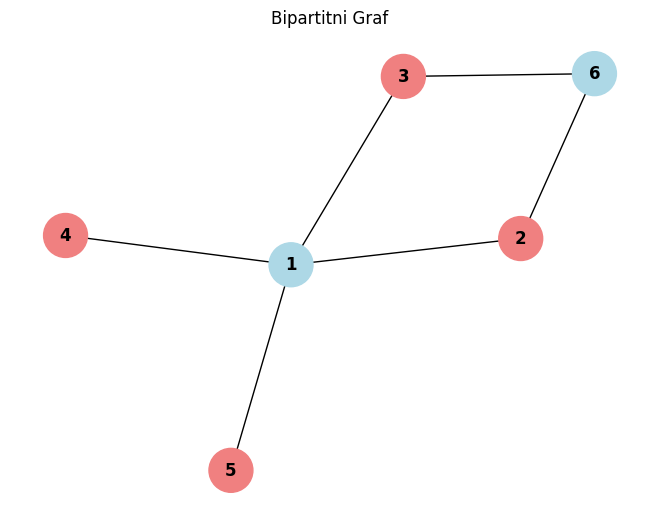

In [308]:
draw_bipartite(bipartitan_graf,a)

In [309]:
#Provjera za nebipartitan:
is_bipartite(nije_bipartitan)

False

##Zadatak 2
##Napišite i testirajte algoritme (DPS i na bazi Laplaciana) za traženje komponenti u neusmjerenom grafu s 10-20 vrhova. Output neka bude broj komponenti i popis vrhova po komponentama. Za usmjereni graf s 10-20 vrhova metodom DPS nađite jake i slabe komponente.

###Definirajmo neusmjereni graf:

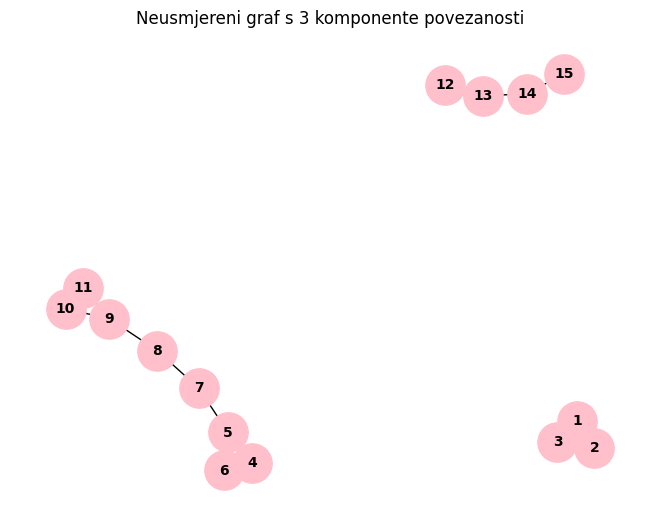

In [310]:
# Inicijalizacija grafa
G = nx.Graph()

# Dodavanje čvorova
G.add_nodes_from(range(1, 16))

# Dodavanje bridova za prvu komponentu
edges = [(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (9, 10), (10, 11), (11, 9),(12, 13), (13, 14), (14, 15),(5, 7), (8, 9)]
G.add_edges_from(edges)

# Crtež grafa
nx.draw(G, with_labels=True, node_color='pink', node_size=800, font_size=10, font_weight='bold')

# Prikaz grafa
plt.title("Neusmjereni graf s 3 komponente povezanosti")
plt.show()

##DPS:

In [311]:
def DFS(graph):
    # DFS algoritam za pronalaženje komponenti u neusmjerenom grafu
    visited = set()
    components = []

    def explore(node, component):
        visited.add(node)
        component.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                explore(neighbor, component)

    for node in graph:
        if node not in visited:
            component = []
            explore(node, component)
            components.append(component)

    return len(components), components

In [312]:
DFS(G)

(3, [[1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11], [12, 13, 14, 15]])

##Algoritam na bazi Laplaciana:

In [313]:
def laplacian_components(graph):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    num_components = np.count_nonzero(eigenvalues < 1e-10)

    # Pronalazak indeksa vrhova po komponentama
    components = [[] for _ in range(num_components)]
    for i, eigenvector in enumerate(eigenvectors.T[:num_components]):
        for j, value in enumerate(eigenvector):
            if abs(value) > 1e-10:
                components[i].append(j+1)  # Indeksiranje započinje s 0, ali u vašem slučaju s 1

    return num_components, components


In [314]:
laplacian_components(G)

(3, [[12, 13, 14, 15], [1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11]])

###Definirnje usmjerenog grafa s 10-20 vrhova:

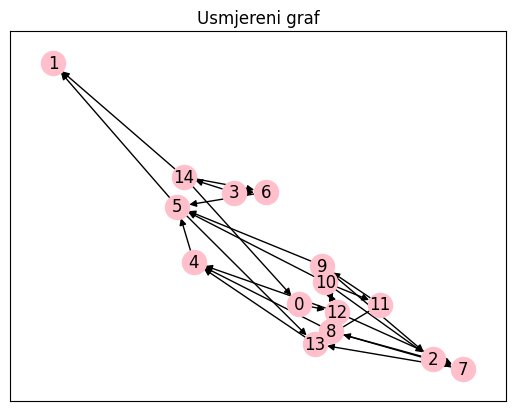

In [315]:
num_nodes = 15
num_edges = 2*num_nodes
G2 = nx.gnm_random_graph(num_nodes, num_edges, directed=True)


pos = nx.spring_layout(G2)  # postavljanje položaja čvorova
nx.draw_networkx(G2, pos, with_labels=True, arrows=True, node_color="pink")
plt.title("Usmjereni graf")
plt.show()

In [316]:
from collections import defaultdict

def dfs(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, component)

def find_components(graph):
    visited = defaultdict(bool)
    components = []
    for node in graph.nodes():
        if not visited[node]:
            component = []
            dfs(graph, node, visited, component)
            components.append(component)
    return components

In [317]:
jake_komponente=list(nx.strongly_connected_components(G2))
print("Jake komponente:", jake_komponente)

Jake komponente: [{1}, {4, 5, 7, 8, 13}, {2}, {9, 10, 11, 12}, {0}, {6}, {14}, {3}]


In [318]:
slabe_komponente=find_components(G2)
print("Slabo povezane komponente:", slabe_komponente)

Slabo povezane komponente: [[0, 12, 10, 5, 13, 4, 8, 7, 1, 11, 9, 2], [3, 6, 14]]


##Zadatak 3


## *1. Za neusmjereni netežinski graf s 20tak vrhova, za input 2 vrha ispisati veličinu minimalnog bridnog reza između njih.*

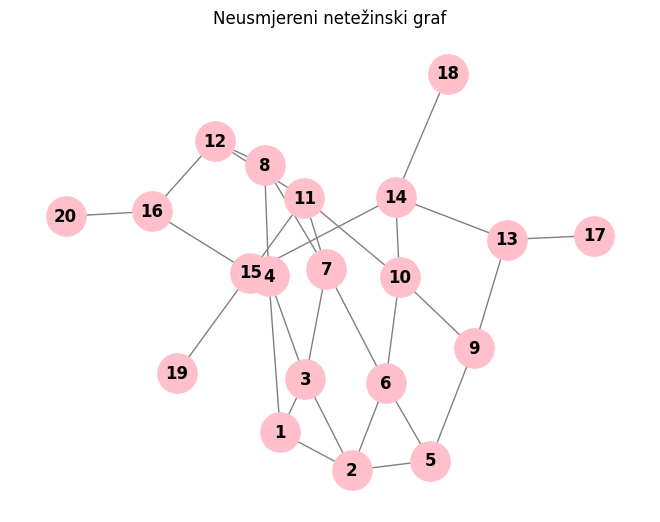

In [319]:
# Inicijalizacija grafa
G3 = nx.Graph()

# Dodavanje čvorova
# Dodavanje čvorova
num_nodes = 20
G3.add_nodes_from(range(1, num_nodes+1))

# Dodavanje bridova
edges = [
    (1, 2), (1, 3), (1, 4), (2, 3), (2, 5), (2, 6),
    (3, 4), (3, 7), (4, 8), (5, 6), (5, 9), (6, 7),
    (6, 10), (7, 8), (7, 11), (8, 12), (9, 10), (9, 13),
    (10, 11), (10, 14), (11, 12), (11, 15), (12, 16), (13, 14),
    (13, 17), (14, 15), (14, 18), (15, 16), (15, 19), (16, 20)
]

G3.add_edges_from(edges)

# Crtanje grafa
nx.draw(G3, with_labels=True, font_weight='bold', node_size=800, node_color='pink', edge_color='gray')
plt.title("Neusmjereni netežinski graf")
plt.show()


In [320]:
def min_cut_size(graph, source, target):
    # Pronađi minimalni bridni rez koristeći algoritam za maksimalni protok
    cut_value = nx.edge_connectivity(graph, source, target)
    return cut_value

In [321]:
# Input vrhova za koje želite izračunati minimalni bridni rez
vrh1 = 11
vrh2 = 7

# Izračunaj i ispiši minimalni bridni rez između odabranih vrhova
minimalni_bridni_rez = min_cut_size(G3, vrh1, vrh2)
print(f"Minimalni bridni rez između vrha {vrh1} i vrha {vrh2} je: {minimalni_bridni_rez}")

Minimalni bridni rez između vrha 11 i vrha 7 je: 4


##*2. Za isti graf naći velične minimalnih bridnih rezova među svaka dva vrha i ispisati par vrhova (ili više njih) koji imaju minimalni bridni rez. Popratiti slikom grafa.*

In [322]:
# Funkcija za pronalaženje minimalnih bridnih rezova i ispisivanje parova s minimalnim rezovima
import itertools
def find_min_cut(graph):
    min_cuts = {}
    for u, v in itertools.combinations(graph.nodes(), 2):
        cut_size = nx.edge_connectivity(graph, u, v)
        if cut_size not in min_cuts:
            min_cuts[cut_size] = []
        min_cuts[cut_size].append((u, v))
    return min_cuts

In [323]:
# Pronalaženje minimalnih bridnih rezova
min_cuts = find_min_cut(G3)

# Ispis rezultata
for cut_size, pairs in sorted(min_cuts.items()):
    print(f"Minimalni bridni rez veličine {cut_size}:")
    for pair in pairs:
        print(pair)
    print()

Minimalni bridni rez veličine 1:
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(7, 17)
(7, 18)
(7, 19)
(7, 20)
(8, 17)
(8, 18)
(8, 19)
(8, 20)
(9, 17)
(9, 18)
(9, 19)
(9, 20)
(10, 17)
(10, 18)
(10, 19)
(10, 20)
(11, 17)
(11, 18)
(11, 19)
(11, 20)
(12, 17)
(12, 18)
(12, 19)
(12, 20)
(13, 17)
(13, 18)
(13, 19)
(13, 20)
(14, 17)
(14, 18)
(14, 19)
(14, 20)
(15, 17)
(15, 18)
(15, 19)
(15, 20)
(16, 17)
(16, 18)
(16, 19)
(16, 20)
(17, 18)
(17, 19)
(17, 20)
(18, 19)
(18, 20)
(19, 20)

Minimalni bridni rez veličine 2:
(1, 13)
(1, 16)
(2, 13)
(2, 16)
(3, 13)
(3, 16)
(4, 13)
(4, 16)
(5, 13)
(5, 16)
(6, 13)
(6, 16)
(7, 13)
(7, 16)
(8, 13)
(8, 16)
(9, 13)
(9, 16)
(10, 13)
(10, 16)
(11, 13)
(11, 16)
(12, 13)
(12, 16)
(13, 14)
(13, 15)
(13, 16)
(14, 16)
(15, 16)

Minimalni bridni rez veličine 3:
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10

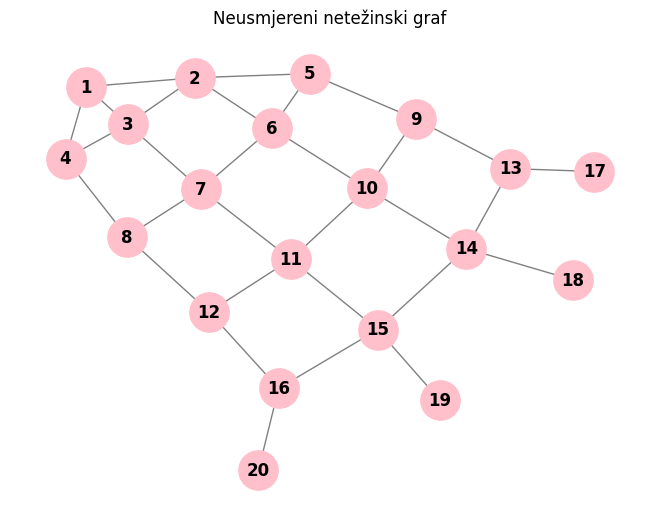

In [324]:
# Crtanje grafa
nx.draw(G3, with_labels=True, font_weight='bold', node_size=800, node_color='pink', edge_color='gray')
plt.title("Neusmjereni netežinski graf")
plt.show()

##*3. Testirati 2. na mreži Zachary karate kluba*

In [325]:
karate = nx.karate_club_graph()

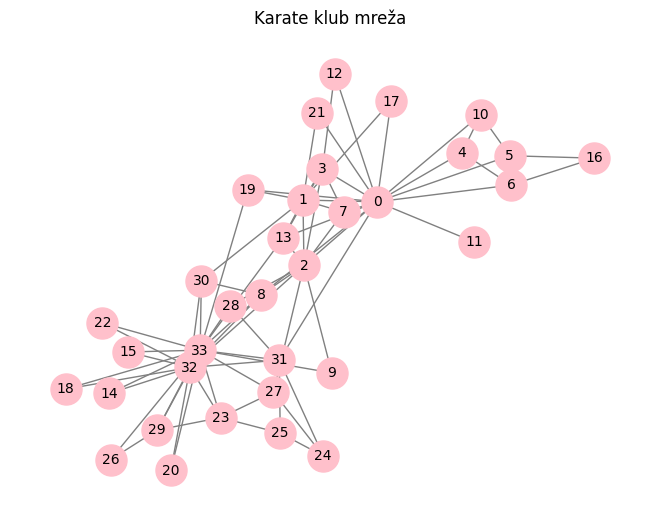

In [326]:
nx.draw(karate, with_labels=True, node_color='pink', edge_color='gray', node_size=500, font_size=10)
plt.title("Karate klub mreža")
plt.show()

In [327]:
# Pronalaženje minimalnih bridnih rezova
min_cuts_karate = find_min_cut(karate)

# Ispis rezultata
for cut_size, pairs in sorted(min_cuts_karate.items()):
    print(f"Minimalni bridni rez veličine {cut_size}:")
    for pair in pairs:
        print(pair)
    print()

Minimalni bridni rez veličine 1:
(0, 11)
(1, 11)
(2, 11)
(3, 11)
(4, 11)
(5, 11)
(6, 11)
(7, 11)
(8, 11)
(9, 11)
(10, 11)
(11, 12)
(11, 13)
(11, 14)
(11, 15)
(11, 16)
(11, 17)
(11, 18)
(11, 19)
(11, 20)
(11, 21)
(11, 22)
(11, 23)
(11, 24)
(11, 25)
(11, 26)
(11, 27)
(11, 28)
(11, 29)
(11, 30)
(11, 31)
(11, 32)
(11, 33)

Minimalni bridni rez veličine 2:
(0, 9)
(0, 12)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 20)
(0, 21)
(0, 22)
(0, 26)
(1, 9)
(1, 12)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 20)
(1, 21)
(1, 22)
(1, 26)
(2, 9)
(2, 12)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 20)
(2, 21)
(2, 22)
(2, 26)
(3, 9)
(3, 12)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 20)
(3, 21)
(3, 22)
(3, 26)
(4, 9)
(4, 12)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 20)
(4, 21)
(4, 22)
(4, 26)
(5, 9)
(5, 12)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 20)
(5, 21)
(5, 22)
(5, 26)
(6, 9)
(6, 12)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 20)
(6, 21)
(6, 22)
(6, 26)
(7, 9)
(7, 12)
(7, 14)
(7, 15)
(7, 16

##Zadatak 4

##*Za neusmjereni netežinski graf s 20tak vrhova, implementirati Kerinhgan-Lin algoritam, za input veličine skupova na koje graf treba podijeliti.*

In [328]:
import networkx as nx

def kernighan_lin_partition(G, k):        #G je graf koji želimo podijeliti,a k je broj iteracja algoritma
    # Inicijalizacija početnog rješenja
    partition = {n: 0 if i < len(G) // 2 else 1 for i, n in enumerate(G.nodes())}

    # Glavna petlja algoritma
    for _ in range(k):
        # Izračunajte poboljšanje
        improvement = {}
        for u in G.nodes():
            for v in G.nodes():
                if partition[u] != partition[v]:
                    improvement[(u, v)] = G[u][v]['weight'] if G.has_edge(u, v) else 0

        # Pronađite najbolje povezivanje
        best_gain = 0
        best_nodes = None
        for nodes, gain in improvement.items():
            if gain > best_gain:
                best_gain = gain
                best_nodes = nodes

        # Ažurirajte particiju
        if best_nodes:
            u, v = best_nodes
            partition[u] = 1 - partition[u]
            partition[v] = 1 - partition[v]

    return partition

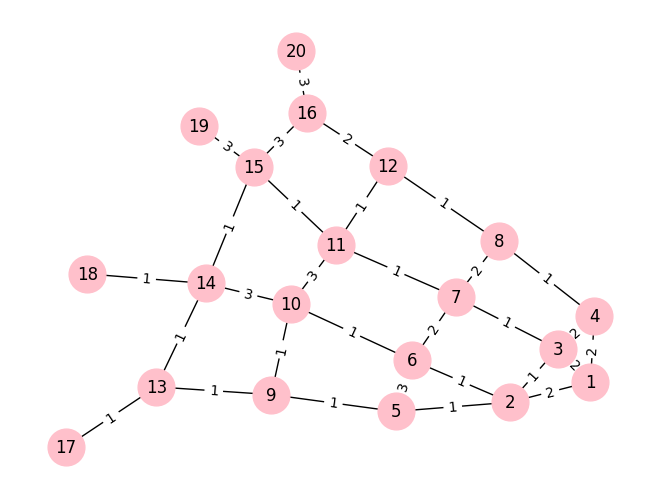

In [329]:
# Inicijalizacija grafa
G4 = nx.Graph()

# Dodavanje čvorova
# Dodavanje čvorova
num_nodes = 20
G4.add_nodes_from(range(1, num_nodes+1))

# Dodavanje bridova
edges = [
    (1, 2,{'weight': 2}), (1, 3,{'weight': 2}), (1, 4,{'weight': 2}), (2, 3,{'weight': 1}), (2, 5,{'weight': 1}), (2, 6,{'weight': 1}),
    (3, 4,{'weight': 2}), (3, 7,{'weight': 1}), (4, 8,{'weight': 1}), (5, 6,{'weight': 3}), (5, 9,{'weight': 1}), (6, 7,{'weight': 2}),
    (6, 10,{'weight': 1}), (7, 8,{'weight': 2}), (7, 11,{'weight': 1}), (8, 12,{'weight': 1}), (9, 10,{'weight': 1}), (9, 13,{'weight': 1}),
    (10, 11,{'weight': 3}), (10, 14,{'weight': 3}), (11, 12,{'weight': 1}), (11, 15,{'weight': 1}), (12, 16,{'weight': 2}), (13, 14,{'weight': 1}),
    (13, 17,{'weight': 1}), (14, 15,{'weight': 1}), (14, 18,{'weight': 1}), (15, 16,{'weight': 3}), (15, 19,{'weight': 3}), (16, 20,{'weight': 3})
]

G4.add_edges_from(edges)

# Crtanje grafa
# Crtanje grafa s težinama
pos = nx.spring_layout(G4)  # Određivanje položaja čvorova
nx.draw(G4, pos, with_labels=True, node_size=700, node_color="pink", font_size=12)  # Crtanje čvorova
labels = nx.get_edge_attributes(G4, 'weight')  # Dobivanje težina bridova
nx.draw_networkx_edge_labels(G4, pos, edge_labels=labels)  # Crtanje težina bridova
plt.show()

In [330]:
# Primjena Kernighan-Lin algoritma
partition = kernighan_lin_partition(G4, 20)
print(partition)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1}


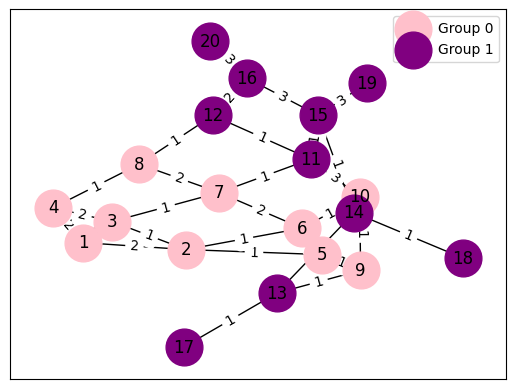

In [331]:
# Crtanje grafa s particijama
pos = nx.spring_layout(G4)

# Podjela čvorova prema particiji
nodes_group0 = [node for node, group in partition.items() if group == 0]
nodes_group1 = [node for node, group in partition.items() if group == 1]

# Crtanje čvorova s imenima
nx.draw_networkx_nodes(G4, pos, nodelist=nodes_group0, node_color='pink', node_size=700, label='Group 0')
nx.draw_networkx_nodes(G4, pos, nodelist=nodes_group1, node_color='purple', node_size=700, label='Group 1')

# Crtanje bridova
nx.draw_networkx_edges(G4, pos)

# Crtanje oznaka čvorova
nx.draw_networkx_labels(G4, pos)

# Crtanje oznaka težina bridova
labels = nx.get_edge_attributes(G4, 'weight')
nx.draw_networkx_edge_labels(G4, pos, edge_labels=labels)

# Dodavanje legende
plt.legend()

# Prikaz
plt.show()

#DRUGI DIO :

##Zadatak 5
*Provesti podjelu mreže na 2 skupa vrhova jednake veličine (±1)pomoću spektralne bisekcije za:*


*   Proizvoljan graf s 20-ak vrhova
*   Mrežu dupina











In [332]:
from sklearn.cluster import KMeans

def spectral_bisection(graph):
    # Izračun Laplaceove matrice
    laplacian_matrix = nx.laplacian_matrix(graph)

    # Izračunaj svojstvene vrijednosti i vektore
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix.toarray())

    # Odaberi svojstveni vektor koji odgovara drugoj najmanjoj svojstvenoj vrijednosti
    eigenvector = eigenvectors[:, 1]

    # Klasterizacija uz pomoć k-means algoritma
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(eigenvector.reshape(-1, 1))
    labels = kmeans.labels_

    # Razdvajanje grafa na dva podgrafova na temelju klasterizacijskih oznaka
    subgraph_1 = []
    subgraph_2 = []
    for i, label in enumerate(labels):
        if label == 0:
            subgraph_1.append(i)
        else:
            subgraph_2.append(i)

    return subgraph_1, subgraph_2

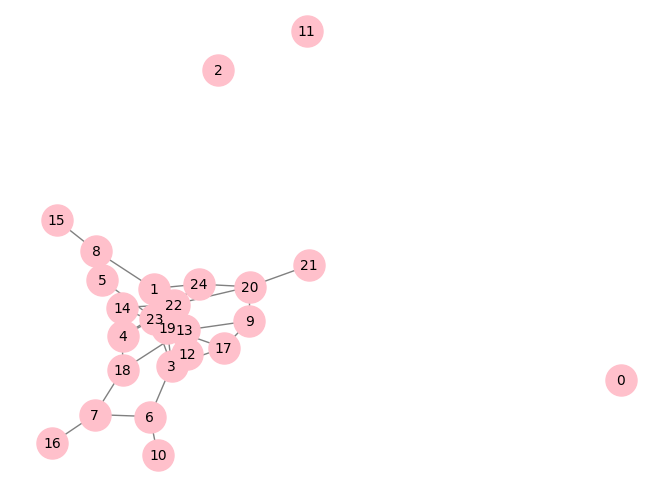

In [333]:
graf = nx.gnm_random_graph(25, 35, directed=False)
nx.draw(graf, with_labels=True, node_color='pink', edge_color='gray', node_size=500, font_size=10)
plt.show()

In [334]:
subgraph_1, subgraph_2 = spectral_bisection(graf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [335]:
print("Podgraf 1:", subgraph_1)
print("Podgraf 2:", subgraph_2)

Podgraf 1: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Podgraf 2: [2]


In [336]:
def plot_subgraphs(graph, subgraph_1, subgraph_2):
    pos = nx.spring_layout(graph)  # Odredi pozicije vrhova grafa
     # Postavi veličinu slike
    plt.figure(figsize=(12, 6))

    # Nacrtaj prvi podgraf
    plt.subplot(121)
    nx.draw_networkx_nodes(graph, pos, nodelist=subgraph_1, node_color='pink')
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges())
    plt.title('Podgraf 1')

    # Nacrtaj drugi podgraf
    plt.subplot(122)
    nx.draw_networkx_nodes(graph, pos, nodelist=subgraph_2, node_color='purple')
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges())
    plt.title('Podgraf 2')

    plt.show()

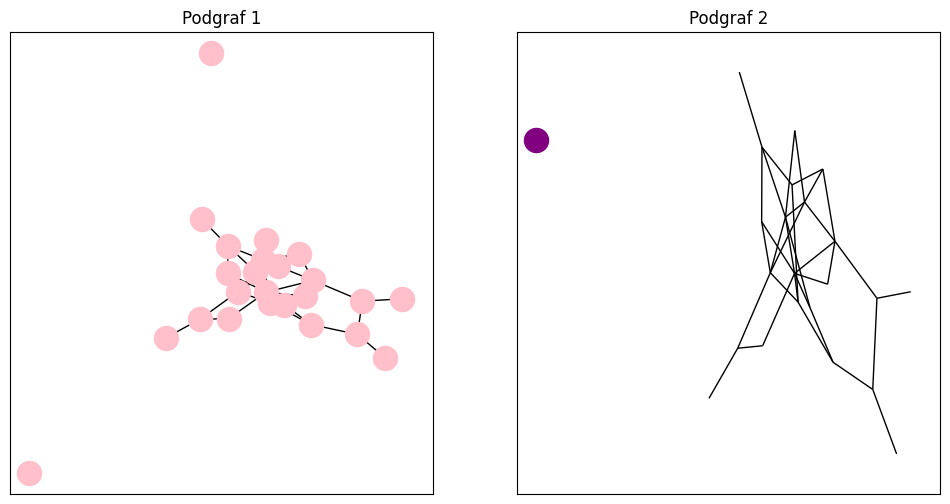

In [337]:
plot_subgraphs(graf, subgraph_1, subgraph_2)

In [338]:
%cd '/content/drive/MyDrive/Analiza kompleksnih mreža'

/content/drive/MyDrive/Analiza kompleksnih mreža


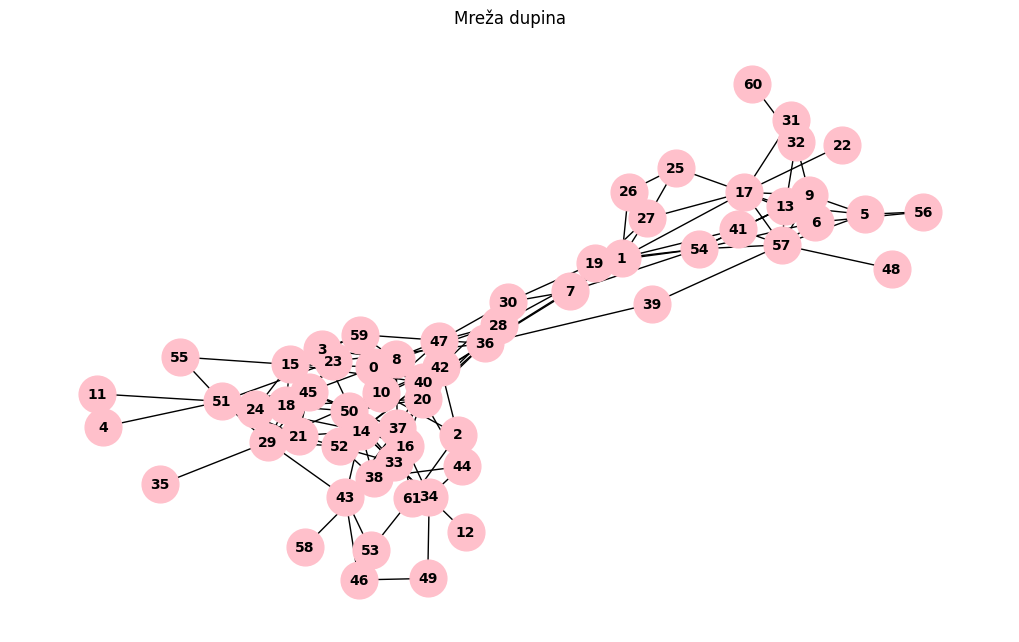

In [339]:
def load_graph_from_gml(filename):
    G = nx.Graph()
    with open(filename, "r") as f:
        graph_data = f.read()
    graph_data = graph_data.split("node")[1:]  # Uklanjanje početka koji sadrži "graph" i "directed" informacije

    # Dodavanje čvorova u graf
    for node_data in graph_data:
        node_id = int(node_data.split("id ")[1].split("\n")[0])
        node_label = node_data.split("label ")[1].split("\n")[0].replace('"', '')
        G.add_node(node_id, label=node_label)

    # Dodavanje bridova u graf
    edges_data = graph_data[-1].split("edge")[1:]
    for edge_data in edges_data:
        source = int(edge_data.split("source ")[1].split("\n")[0])
        target = int(edge_data.split("target ")[1].split("\n")[0])
        G.add_edge(source, target)

    return G

# Naziv GML datoteke
filename = "dolphins.gml"

# Učitavanje grafa
dupini = load_graph_from_gml(filename)

# Crtanje grafa
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(dupini)  # Postavljanje položaja čvorova
nx.draw(dupini, pos, with_labels=True, node_size=700, node_color="pink", font_size=10, font_weight="bold")  # Crtanje grafa
plt.title("Mreža dupina")  # Dodavanje naslova
plt.show()  # Prikaz grafa

In [340]:
subgraph_1_dupini, subgraph_2_dupini = spectral_bisection(dupini)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [341]:
print("Podgraf 1:", subgraph_1_dupini)
print("Podgraf 2:", subgraph_2_dupini)

Podgraf 1: [0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61]
Podgraf 2: [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60]


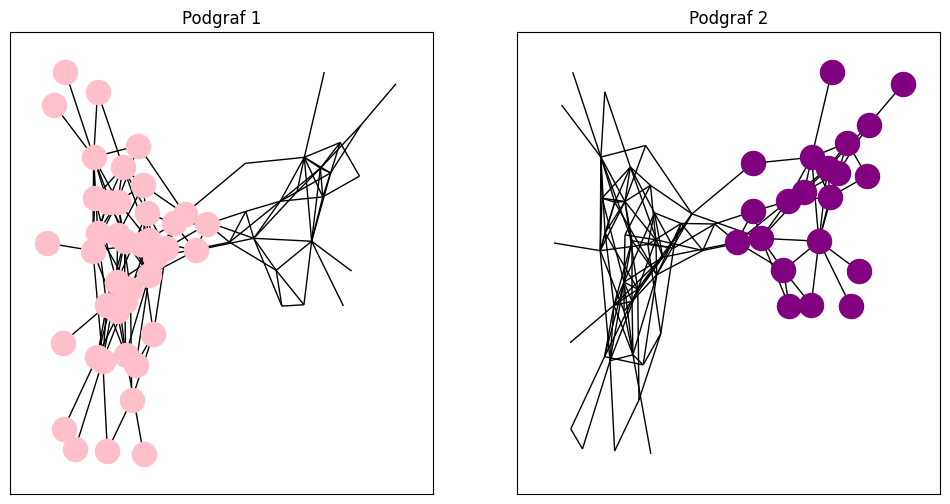

In [342]:
plot_subgraphs(dupini, subgraph_1_dupini, subgraph_2_dupini)

##Zadatak 6
*Na mrežama Zachary karate kluba i dupina, provedite hijerarhijsko klasteriranje uz promatranje sličnosti po kosinusu i average-linkage clustering.
Rezultate prikažite dendrogramom te nacrtajte slike grafova s označeni (obojanim) vrhovima u trenutku postojanja 2 velike zajednice.*

In [343]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cosine

In [344]:
# Računanje sličnosti po kosinusu između svih parova vrhova u grafu
def compute_cosine_similarity(graph):
    n = len(graph.nodes())
    similarity_matrix = np.zeros((n, n))
    nodes = list(graph.nodes())
    for i in range(n):
        for j in range(i+1, n):
            node_i = nodes[i]
            node_j = nodes[j]
            neighbors_i = set(graph.neighbors(node_i))
            neighbors_j = set(graph.neighbors(node_j))
            common_neighbors = neighbors_i.intersection(neighbors_j)
            similarity = len(common_neighbors) / (np.sqrt(len(neighbors_i)) * np.sqrt(len(neighbors_j)))
            similarity_matrix[i, j] = similarity_matrix[j, i] = similarity
    return similarity_matrix


In [345]:
# Pronalaženje trenutka kada postoji 2 velike zajednice
def find_two_communities(graph, similarity_matrix):
    Z = linkage(1 - similarity_matrix, method='average', optimal_ordering=True)
    dendrogram(Z)
    plt.title("Dendrogram")
    plt.show()

    # Pretražujemo dendrogram dok ne dobijemo 2 velike zajednice
    partition = []
    for k in range(2, len(graph.nodes())):
        partition = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(graph, weight=None))
        if len(partition) == 2:
            break
    return partition


In [346]:
#Prikazuje rezultirajuće podgrafove
def plot_subgraphs(graph, communities):
    pos = nx.spring_layout(graph)  # Odredi pozicije vrhova grafa

    # Postavi veličinu slike
    plt.figure(figsize=(12, 6))

    # Nacrtaj prvi podgraf
    plt.subplot(121)
    nx.draw_networkx_nodes(graph, pos, nodelist=communities[0], node_color='pink')
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges())
    plt.title('Podgraf 1')

    # Nacrtaj drugi podgraf
    plt.subplot(122)
    nx.draw_networkx_nodes(graph, pos, nodelist=communities[1], node_color='purple')
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges())
    plt.title('Podgraf 2')

    plt.show()

In [347]:
#Učitavanje Zachary karate kluba
karate = nx.karate_club_graph()

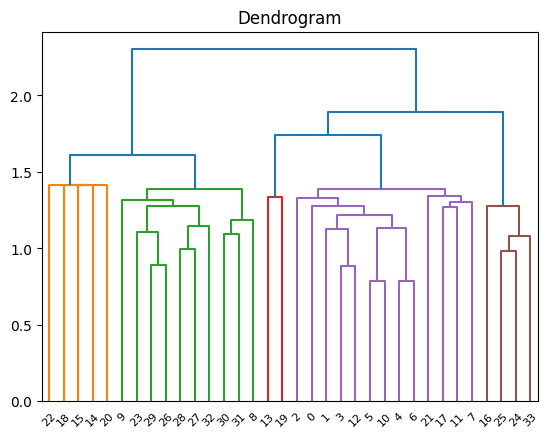

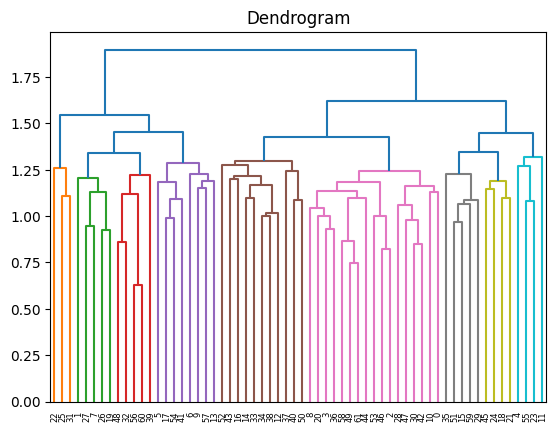

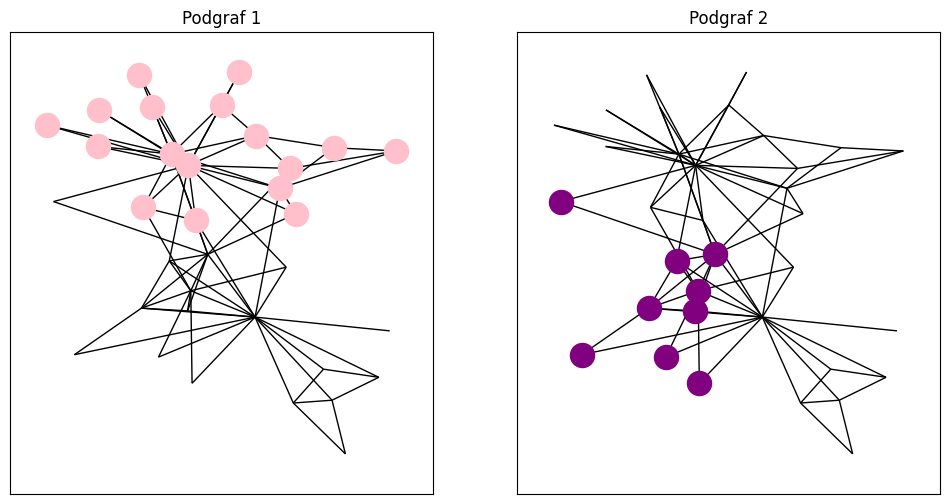

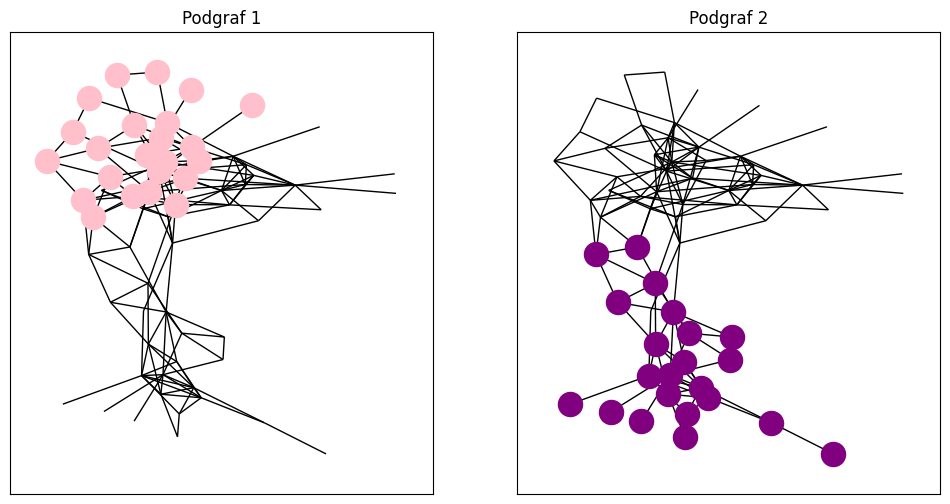

In [348]:
# Računanje sličnosti po kosinusu između vrhova
karate_similarity = compute_cosine_similarity(karate)
dupini_similarity = compute_cosine_similarity(dupini)

# Pronalaženje dvije zajednice u oba grafa
karate_communities = find_two_communities(karate, karate_similarity)
dupini_communities = find_two_communities(dupini, dupini_similarity)

# Prikaz rezultirajućih podgrafova
plot_subgraphs(karate, karate_communities)
plot_subgraphs(dupini, dupini_communities)

##Zadatak 7
*Provesti Girvan-Newman  algoritam za detekciju zajednica na mreži Zachary karate kluba i
mreži dupina i nacrtati dendrograme.
Ako u nekom trenutku više bridova ima maksimalnu međupoloženost*
1.   Izabrati nasumično onaj koji se izbacuje. (provesti bar 3 puta algoritam)
2.   Ukloniti sve bridove s maksimalnom međupoloženošću.

*Promotriti kako se dendrogrami razlikuju u ovisnosti koji brid je nasumično izabran za izbacivanje i koja je razlika sa slučajem 2).*

Kada bi nasumični čvor za izbacivanje:

In [349]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def girvan_newman_random(graph, iterations=4):
    for _ in range(iterations):
        # Inicijalno dijelimo graf na jednu komponentu
        components = [c for c in nx.connected_components(graph)]

        while len(components) == 1:  # Dok ima samo jedna komponenta
            # Izračunajmeđupoloženost bridova
            edge_betweenness = nx.edge_betweenness_centrality(graph)
            # Pronađimo maksimalnu vrijednost međupoloženosti
            max_betweenness = max(edge_betweenness.values())
            # Pronađimo sve bridove s maksimalnom vrijednošću međupoloženosti
            max_betweenness_edges = [edge for edge, value in edge_betweenness.items() if value == max_betweenness]
            # Nasumično izaberemo jedan od bridova za uklanjanje
            edge_to_remove = random.choice(max_betweenness_edges)

            # Uklonimo odabrani brid iz grafa
            graph.remove_edge(*edge_to_remove)
            # Ponovno dijelimo graf na komponente
            components = [c for c in nx.connected_components(graph)]

        # Vratimo podjele na komponente
        print(f"Iteracija {_+1}: Komponente grafa: {components}")

    return components



Iteracija 1: Komponente grafa: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Iteracija 2: Komponente grafa: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Iteracija 3: Komponente grafa: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Iteracija 4: Komponente grafa: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


<ipython-input-350-a56ea822e1e2>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(nx.to_numpy_array(karate_club_graph), method='ward')


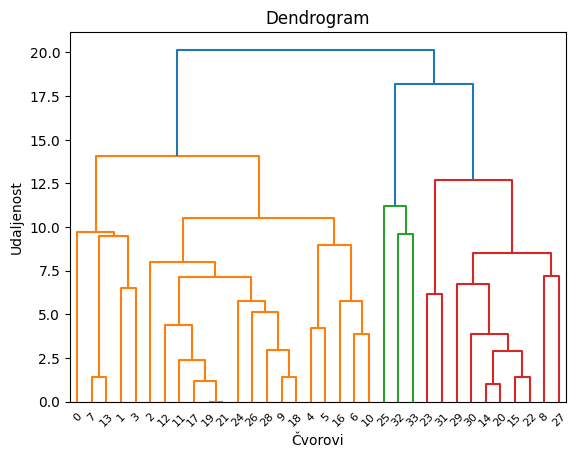

In [350]:
# Učitajmo Zachary karate klub graf
karate_club_graph = nx.karate_club_graph()

# Pokrenimo Girvan-Newman algoritam na Zachary karate klub grafu
result = girvan_newman_random(karate_club_graph)

# Izračunamo linkage matrix za dendrogram
linkage_matrix = linkage(nx.to_numpy_array(karate_club_graph), method='ward')

# Prikazujemo dendrogram
def plot_dendrogram(linkage_matrix, labels):
    dendrogram(linkage_matrix, labels=labels)
    plt.title('Dendrogram')
    plt.ylabel('Udaljenost')
    plt.xlabel('Čvorovi')
    plt.show()

plot_dendrogram(linkage_matrix, labels=list(karate_club_graph.nodes()))

Iteracija 1: Komponente grafa: [{0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61}, {1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60}]
Iteracija 2: Komponente grafa: [{0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61}, {1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60}]
Iteracija 3: Komponente grafa: [{0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61}, {1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60}]
Iteracija 4: Komponente grafa: [{0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55

<ipython-input-351-9b829a1cffe2>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_dupini = linkage(nx.to_numpy_array(dupini), method='ward')


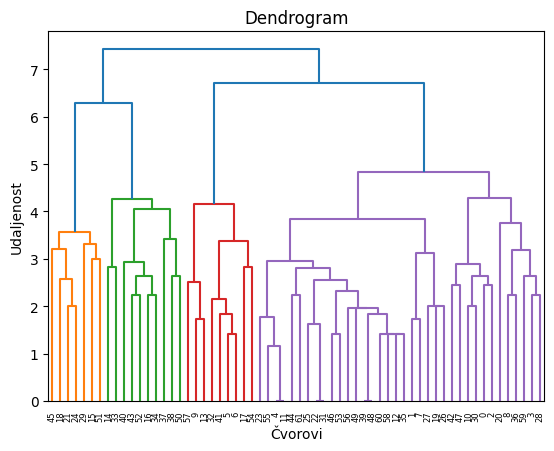

In [351]:
# Pokrenimo Girvan-Newman algoritam na mreži dupina
result_dupini = girvan_newman_random(dupini)

# Izračunamo linkage matrix za dendrogram
linkage_matrix_dupini = linkage(nx.to_numpy_array(dupini), method='ward')

# Prikazujemo dendrogram
plot_dendrogram(linkage_matrix_dupini, labels=list(dupini.nodes()))

Kada uklanjamo sve bridove s maksimalnom međupoloženošću

In [352]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def girvan_newman_remove_all(graph):
    components_history = []  # Lista za pohranu komponenti u svakoj iteraciji

    # Iteriramo sve dok ima bridova u grafu
    while graph.edges():
        # Izračunajmeđupoloženost bridova
        edge_betweenness = nx.edge_betweenness_centrality(graph)

        # Pronađimo maksimalnu vrijednost međupoloženosti
        max_betweenness = max(edge_betweenness.values())

        # Uklanjamo sve bridove s maksimalnom vrijednošću međupoloženosti
        max_betweenness_edges = [edge for edge, value in edge_betweenness.items() if value == max_betweenness]
        for edge_to_remove in max_betweenness_edges:
            graph.remove_edge(*edge_to_remove)

        # Ažuriramo komponente grafa samo ako ima bridova
        if graph.edges():
            components = [frozenset(c) for c in nx.connected_components(graph)]  # Koristimo frozenset za hashable set
            # Pohranjujemo komponente u listu
            components_history.append(components)

    # Vraćamo komponente i povijest komponenti
    return components, components_history

# Funkcija za izračunavanje dendrograma
def plot_dendrogram(graph):
    # Izračunajmo linkage matrix za dendrogram
    linkage_matrix = linkage(nx.to_numpy_array(graph), method='ward')

    # Prikazujemo dendrogram
    dendrogram(linkage_matrix, labels=list(graph.nodes()))
    plt.title('Dendrogram')
    plt.ylabel('Udaljenost')
    plt.xlabel('Čvorovi')
    plt.show()

Broj komponenti u grafu: 24


<ipython-input-352-96137b34d916>:33: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(nx.to_numpy_array(graph), method='ward')
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


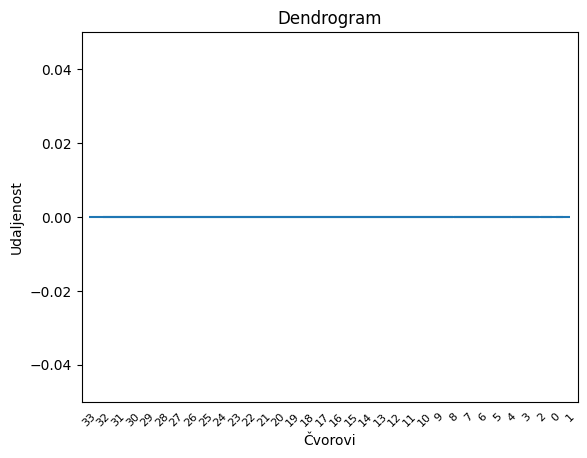

In [353]:
# Učitavanje Zachary karate kluba grafa
karate_club_graph = nx.karate_club_graph()

# Primjena Girvan-Newman algoritma s uklanjanjem svih bridova s maksimalnom međupoloženošću
components, components_history = girvan_newman_remove_all(karate_club_graph)

# Ispis broja komponenti
print("Broj komponenti u grafu:", len(components))

# Prikazivanje dendrograma
plot_dendrogram(karate_club_graph)


Iteracija 1: Broj komponenti: 43
Iteracija 2: Broj komponenti: 94
Konačni broj komponenti: 94


<ipython-input-354-878fb2f8d67b>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(nx.to_numpy_array(graph), method='ward')


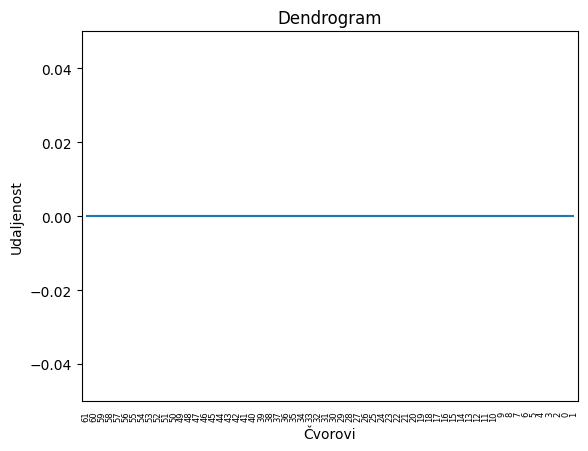

In [356]:
# Naziv GML datoteke
filename = "dolphins.gml"

# Učitavanje grafa
dupini = load_graph_from_gml(filename)

# Pokrenimo Girvan-Newman algoritam na mreži dupina
components_history = girvan_newman_remove_all(dupini)

# Ispisujemo broj komponenti u svakoj iteraciji
for i, components in enumerate(components_history):
    print(f"Iteracija {i+1}: Broj komponenti: {len(components)}")

# Ispisujemo broj konačnih komponenti
print(f"Konačni broj komponenti: {len(components_history[-1])}")

# Crtamo dendrogram
plot_dendrogram(dupini)

##Zadatak 8
*Izračunati modularnost za svaki korak u podjeli Zachary karate kluba i
mreže dupina za metode iz zadataka 6. i 7. (u 7. za 2). Nacrtati onu podjelu
koja ima najveću modularnost.*

In [357]:
import networkx as nx

# Funkcija za izračun modularnosti za određenu podjelu grafa
def calculate_modularity(graph, communities):
    return nx.algorithms.community.modularity(graph, communities)

# Funkcija za izračun modularnosti za svaki korak u podjeli Zachary karate kluba
def calculate_modularity_steps(graph):
    modularity_steps = []  # Lista za pohranu modularnosti za svaki korak
    components_history = girvan_newman_remove_all(graph)  # Podjele grafa za svaku iteraciju

    # Izračun modularnosti za svaki korak
    for components in components_history:
        modularity = calculate_modularity(graph, components)
        modularity_steps.append(modularity)

    return modularity_steps

# Izračun modularnosti za Zachary karate klub graf
karate_modularity_steps = calculate_modularity_steps(karate_club_graph)

UnboundLocalError: local variable 'components' referenced before assignment

In [355]:
#Za modularnost gotova funkcija modularity
#Zadatak 8. samo svaki put izracunati modullarnost i naacrtat onu koja ima najvecu (u zachary bi trebala ova s 5 sa slike)